In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
df=pd.read_csv('data/googleplaystore.csv')

In [3]:
df_copy=df.copy()

In [4]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df_copy.shape

(10841, 13)

In [6]:
df_copy.columns=df_copy.columns.str.replace(" ","_")

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Writing a function to check and delete duplicates:

In [8]:
def findduplicate(dataframe):
    print("Checking Duplicates:")
    num_duplicates=df_copy.duplicated(subset=None,keep='first').sum()
    if num_duplicates>0:
        print(f"There are {num_duplicates} in the dataset")
        df_copy.drop_duplicates(keep="first",inplace=True)
        print(f"{num_duplicates} of duplicates are deleted!")
    else:
        print("There are no duplicates!")

In [9]:
findduplicate(df_copy)

Checking Duplicates:
There are 483 in the dataset
483 of duplicates are deleted!


#Check for null values:

In [10]:
df_copy=df_copy.replace('?',np.nan)

In [11]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

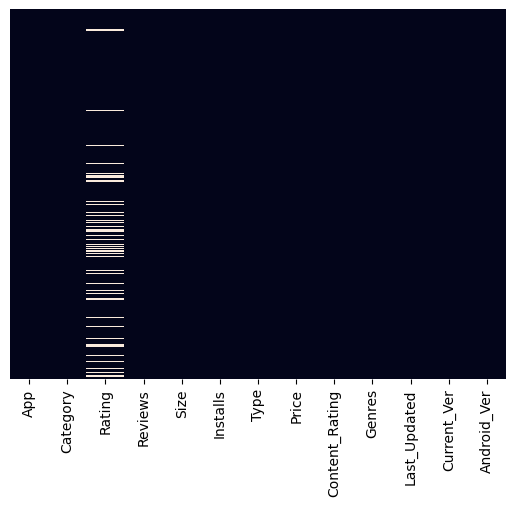

In [12]:
plt.figure(figure=(15,6))
sns.heatmap(df_copy.isnull(), yticklabels=False,cbar=False)
plt.show()

In [13]:
df_copy.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [14]:
df_copy.dropna(subset=['Android_Ver','Current_Ver','Content_Rating','Type'],inplace=True,axis=0)

In [15]:
df_copy.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , nan, 4.8, 4.9,
       3.6, 3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [16]:
df_copy.Rating=df_copy.Rating.fillna(df.Rating.mode()[0])

In [17]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [18]:
df_copy.Reviews=df_copy.Reviews.astype(int)

In [19]:
df_copy.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
df_copy.Size=df_copy.Size.str.replace('M','000')
df_copy.Size=df_copy.Size.str.replace('k','')
df_copy.Size=df_copy.Size.str.replace('1000+','1000')
df_copy.Size=df_copy.Size.replace('Varies with device',np.nan)

In [21]:
df_copy.Size=df_copy.Size.astype(float)

In [22]:
df_copy.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [23]:
df_copy.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
unrequired_items=['$',',','+']
cols=['Price','Installs']
for items in unrequired_items:
    for category in cols:
        df_copy[category]=df_copy[category].str.replace(items,'')

In [25]:
df_copy.Installs=df_copy.Installs.astype(int)
df_copy.Price=df_copy.Price.astype(float)

In [26]:
df_copy['Last_Updated']=pd.to_datetime(df_copy['Last_Updated'])
df_copy['Date']=df_copy['Last_Updated'].dt.day
df_copy['Month']=df_copy['Last_Updated'].dt.month
df_copy['Year']=df_copy['Last_Updated'].dt.year

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int32         
 4   Size            8821 non-null   float64       
 5   Installs        10346 non-null  int32         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content_Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last_Updated    10346 non-null  datetime64[ns]
 11  Current_Ver     10346 non-null  object        
 12  Android_Ver     10346 non-null  object        
 13  Date            10346 non-null  int32         
 14  Month           10346 non-null  int32         
 15  Year   

In [28]:
df_copy.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [29]:
df_copy.Type=df_copy.Type.apply(lambda x:'0' if str(x).lower()=='Free' else 1)

In [30]:
df_copy.Type=df_copy.Type.astype(int)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int32         
 4   Size            8821 non-null   float64       
 5   Installs        10346 non-null  int32         
 6   Type            10346 non-null  int32         
 7   Price           10346 non-null  float64       
 8   Content_Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last_Updated    10346 non-null  datetime64[ns]
 11  Current_Ver     10346 non-null  object        
 12  Android_Ver     10346 non-null  object        
 13  Date            10346 non-null  int32         
 14  Month           10346 non-null  int32         
 15  Year   

In [32]:
df_copy.to_csv('data/google_play_store_cleaned.csv',index=False)

#EDA

In [33]:
numerical_features=[features for features in df_copy.columns if df_copy[features].dtype in ['int32','float64']]
print(f" There are {len(numerical_features)} numerical features and they are:",numerical_features)

 There are 9 numerical features and they are: ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Date', 'Month', 'Year']


In [34]:
categorical_features=[features for features in df_copy.columns if df_copy[features].dtype in ['object'] ]
print(f" There are {len(categorical_features)} categorical features and they are:",categorical_features)

 There are 6 categorical features and they are: ['App', 'Category', 'Content_Rating', 'Genres', 'Current_Ver', 'Android_Ver']


#Univirate Analysis:

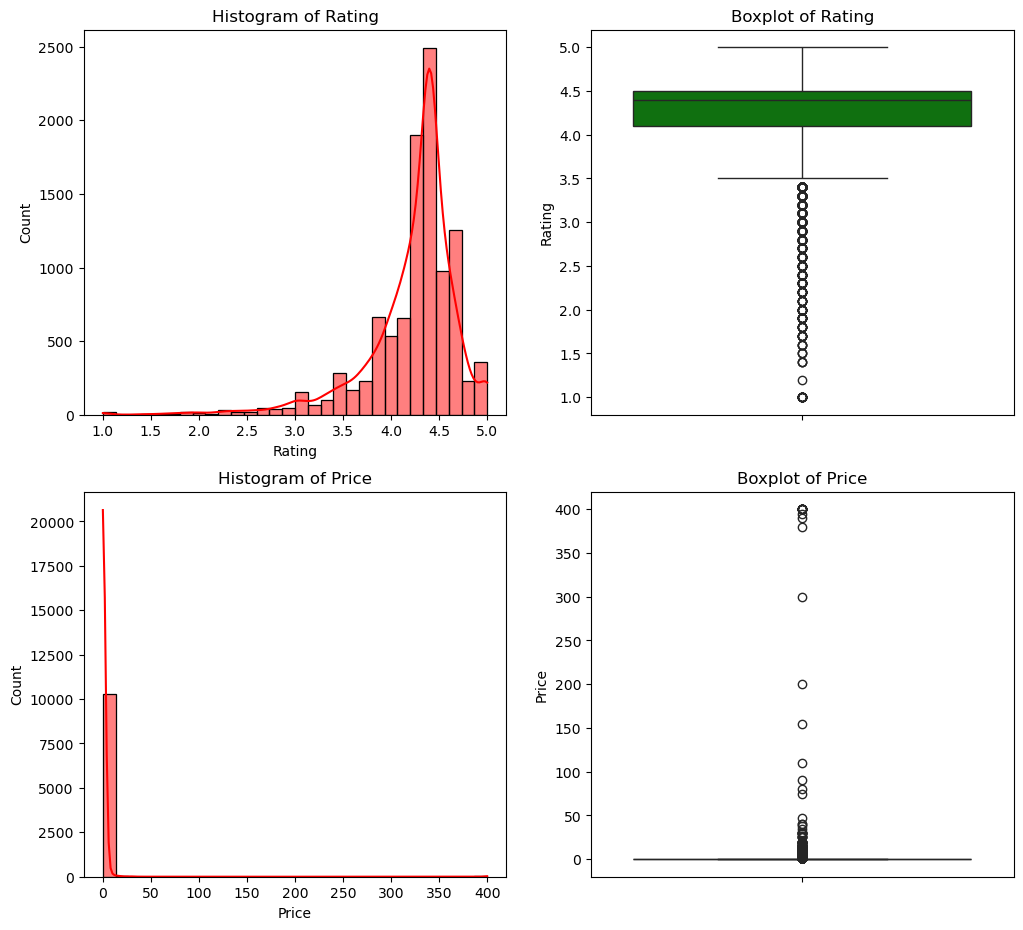

In [35]:
fig,axes=plt.subplots(2,2,figsize=(12,11))
axes=axes.flat

for index,cols in enumerate(['Rating','Price']):
    sns.histplot(df_copy[cols],bins=30,kde=True,ax=axes[index*2],color='red')
    axes[index*2].set_title(f'Histogram of {cols}')


for index,cols in enumerate(['Rating','Price']):
    sns.boxplot(y=df_copy[cols],ax=axes[index*2+1],color='green')
    axes[index*2+1].set_title(f'Boxplot of {cols}')

In [36]:
print(f'The skewness of rating is {df_copy.Rating.skew()}')
print(f'The skewness of Price is {df_copy.Price.skew()}')

The skewness of rating is -2.073450387346115
The skewness of Price is 23.311966061774175


In [37]:
df_copy[['Rating','Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10346.0,4.217881,0.489757,1.0,4.1,4.4,4.5,5.0
Price,10346.0,1.031561,16.287252,0.0,0.0,0.0,0.0,400.0


Insight 1: The rating of apps in google playstore is negatively skewed. This implies that most of the apps are highly rated and enjoyed among users.

Insight 2:The large skewness value of 23.3 of price indicates that it is heavily right-skewed. This means that most of the games are free of cost and some games are very expensive. Since all the 25,50 and 75 percetile is zero, it implies that more than 75% of the games available in google app store are free of cost.

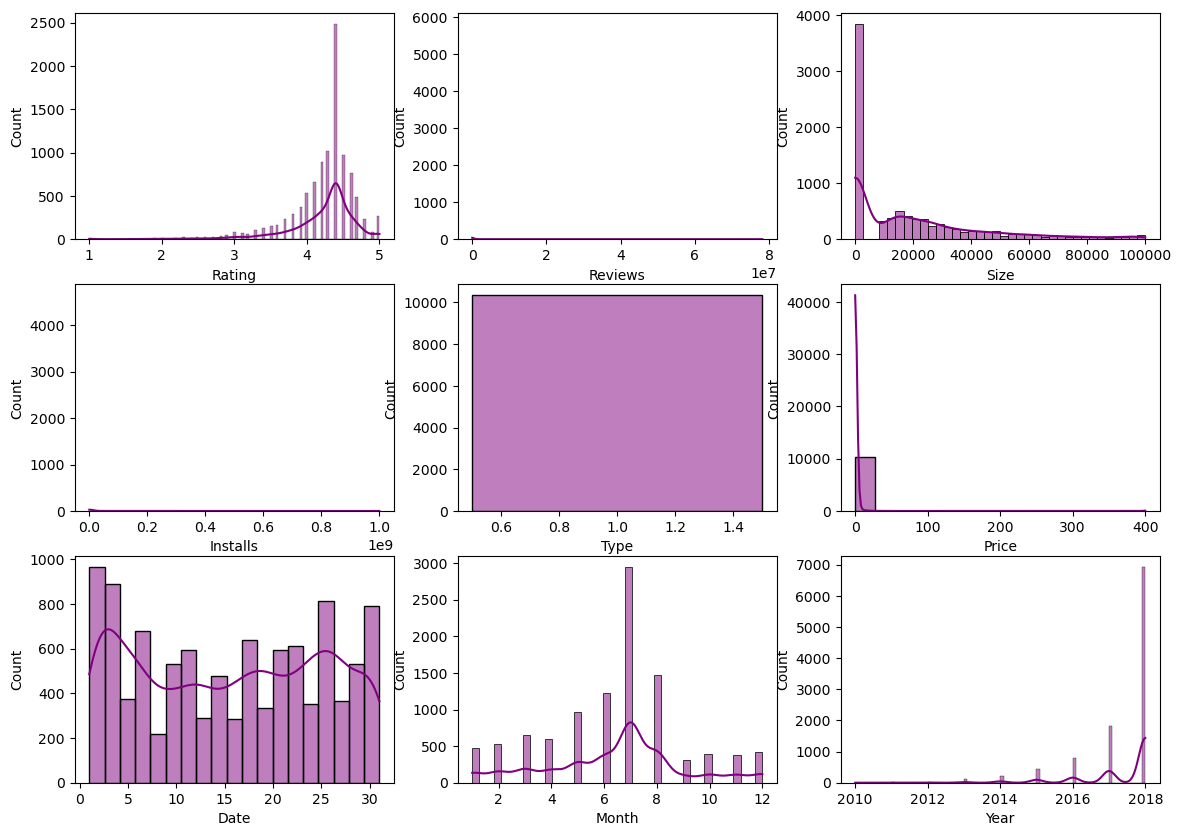

In [38]:
fig,axes=plt.subplots(3,3,figsize=(14,10))
axes=axes.flat
for index,col in enumerate(numerical_features):
    sns.histplot(df_copy[col],ax=axes[index],kde='True',color='Purple')

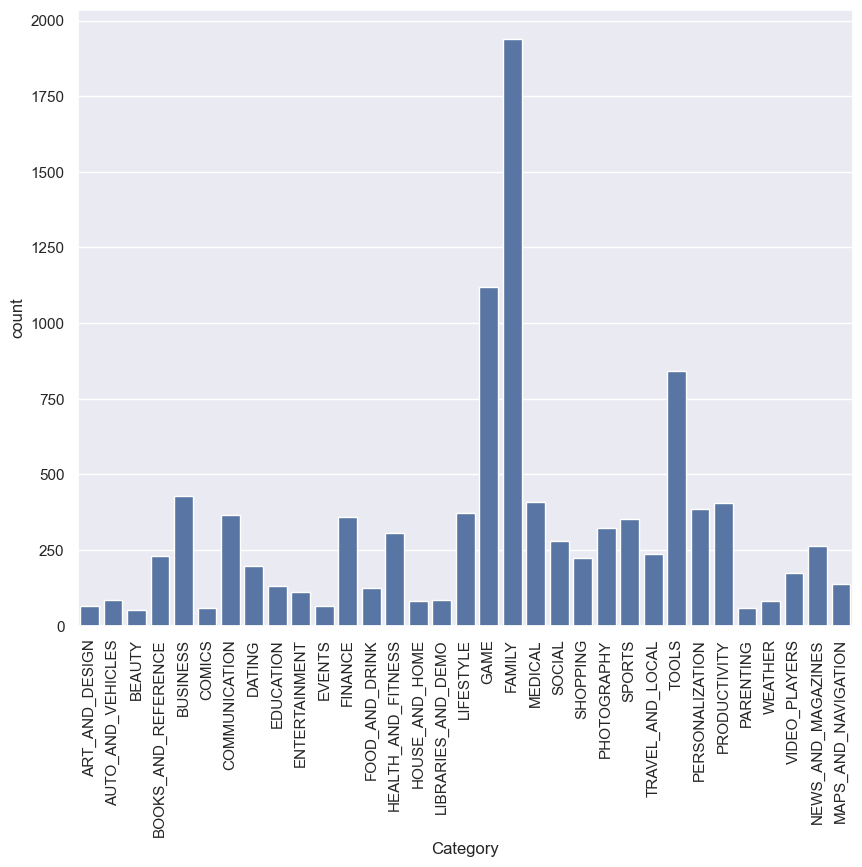

In [39]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x="Category",data=df_copy)
plt.xticks(rotation=90)

plt.show()

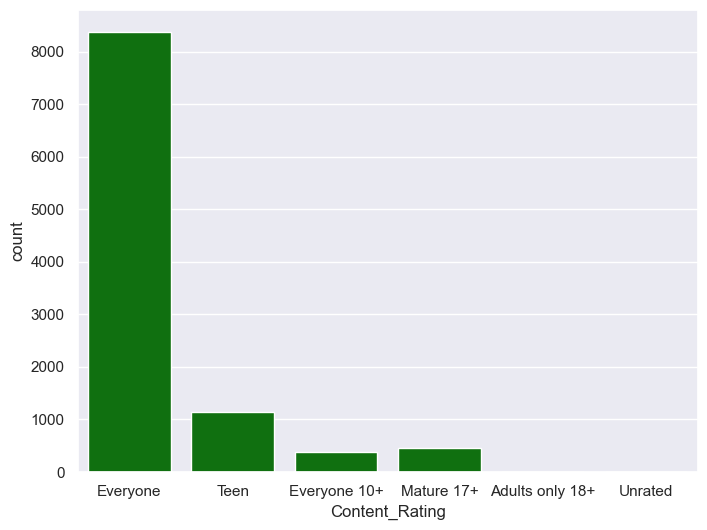

In [40]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x="Content_Rating",data=df_copy,color='green')

plt.show()

Insight 3: Apps that fall under family and game category are more popular. Moreover, if the content is raited for everyone it has a more chance of being downloaded.

#Bivariate Analysis

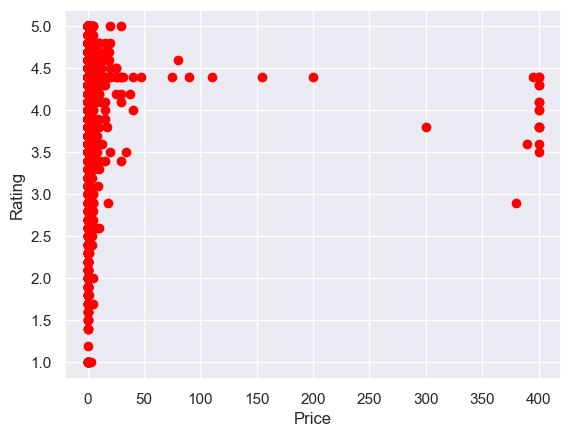

In [41]:
plt.scatter(x='Price',y='Rating',data=df_copy,color='red')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Insight 4:Since most of the apps are available for free, rating and price do not seem to have a lot of relationship. However, there are few apps that cost more than $50 and almost all of them have rating over 3.

In [42]:
df_numeric=df_copy[numerical_features]
df_numeric.drop('Type',inplace=True,axis='columns')

C:\Users\khadk\AppData\Local\Temp\ipykernel_8740\4148840303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop('Type',inplace=True,axis='columns')


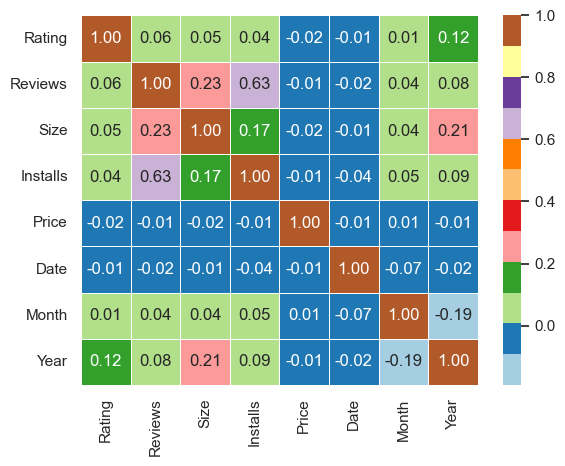

In [43]:
sns.heatmap(df_numeric.corr(),linewidth=0.5,cmap='Paired',annot=True,fmt='.2f')
plt.show()

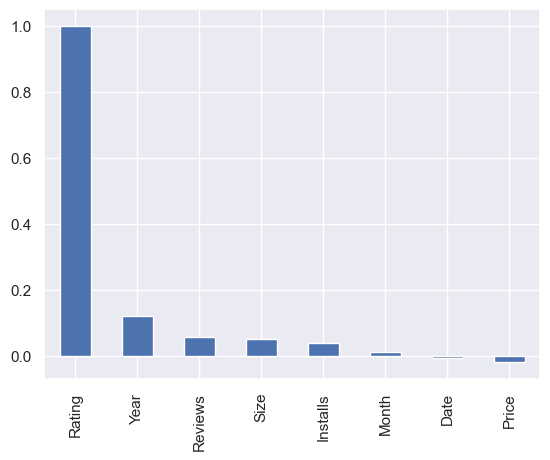

In [44]:
df_numeric.corr()['Rating'].sort_values(ascending=False).plot(kind='bar')
plt.show()

Insight 5: Rating has a positive correlation with year, reviews, size, number of installs and months, whereas, it has a negative correlation with the price.

C:\Users\khadk\AppData\Local\Temp\ipykernel_8740\986077831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x='Category',y='Rating',palette = "Set1")


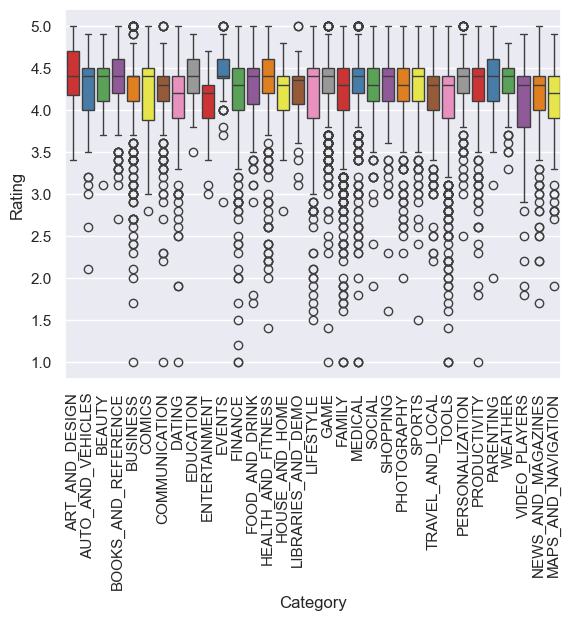

In [45]:
sns.boxplot(data=df_copy,x='Category',y='Rating',palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#Top 10 Apps with 5 rating and highest number of installs in google play store:

In [46]:
five_rated=df_copy.loc[df_copy.Rating==5]
five_rated_apps=five_rated['App']
five_rated_apps_count=five_rated['App'].value_counts()
print(f"There are {len(five_rated_apps_count)} five rated apps in google play store")

There are 271 five rated apps in google play store


In [47]:
highest_installs=five_rated.nlargest(10,'Installs')[['App','Installs']]
highest_installs

,App,Installs
9511,Ek Bander Ne Kholi Dukan,10000
7514,CL Keyboard - Myanmar Keyboard (No Ads),5000
8058,Oración CX,5000
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",5000
329,Hojiboy Tojiboyev Life Hacks,1000
612,American Girls Mobile Numbers,1000
1547,Eternal life,1000
2527,BP Journal - Blood Pressure Diary,1000
4539,R Programing Offline Tutorial,1000
5064,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka,1000


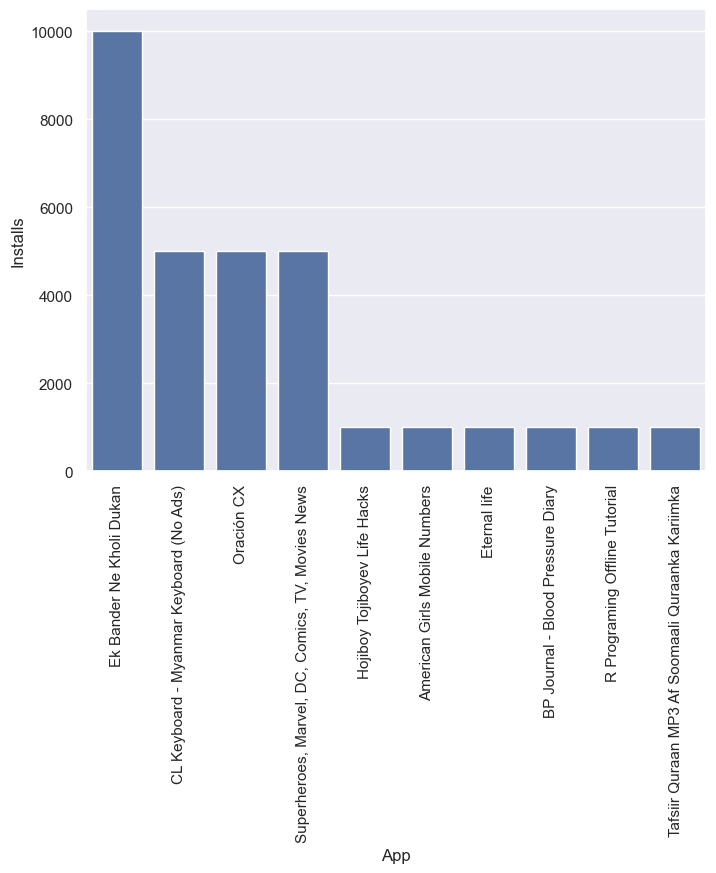

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x=highest_installs['App'],y=highest_installs['Installs'])
plt.xticks(rotation=90)
plt.show()

#Insight 6: Among all the 5 rated apps, Ek Bander Ne Kholi Dukan is the most installed app. This app was immensely enjoyed by the users, evidently also because the second five-stared app is almost half the number of it's install.

#Most installed app in each year

In [49]:
year=df_copy.groupby('Year',group_keys=False).apply(lambda x:x.loc[x['Installs'].idxmax(),['Year','App','Installs']])
year

C:\Users\khadk\AppData\Local\Temp\ipykernel_8740\1659178618.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year=df_copy.groupby('Year',group_keys=False).apply(lambda x:x.loc[x['Installs'].idxmax(),['Year','App','Installs']])


,Year,App,Installs
Year,,,
2010,2010,FML F*ck my life + widget,100000
2011,2011,Bubble,5000000
2012,2012,Aviary Stickers: Free Pack,10000000
2013,2013,SpongeBob Diner Dash,50000000
2014,2014,Motorola Alert,50000000
2015,2015,Smash Hit,100000000
2016,2016,Account Manager,100000000
2017,2017,slither.io,100000000
2018,2018,Google Play Books,1000000000


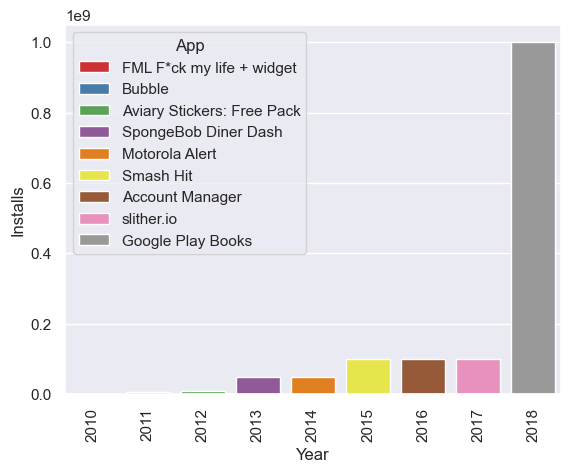

In [50]:
sns.barplot(x=year['Year'], y=year['Installs'], hue=year['App'],palette = "Set1")
plt.xticks(rotation=90)
plt.show()

Insight 7: The number of the most popular apps being installed was increasing gradually until 2017, whereas, 2018 say that the maximum install of Google Play Books. Over the years, Google Play Book was the app that was downloaded 5 times more in comparision to the number of installs over the other years.

In [51]:
#Does a particular category have a high review and rating?

In [52]:
high_review_rating=df_copy.groupby('Category').agg(avg_rating=('Rating','mean'),avg_reviews=('Reviews','mean')).reset_index()

C:\Users\khadk\AppData\Local\Temp\ipykernel_8740\1205097133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='Category', data=high_review_rating,palette='viridis')


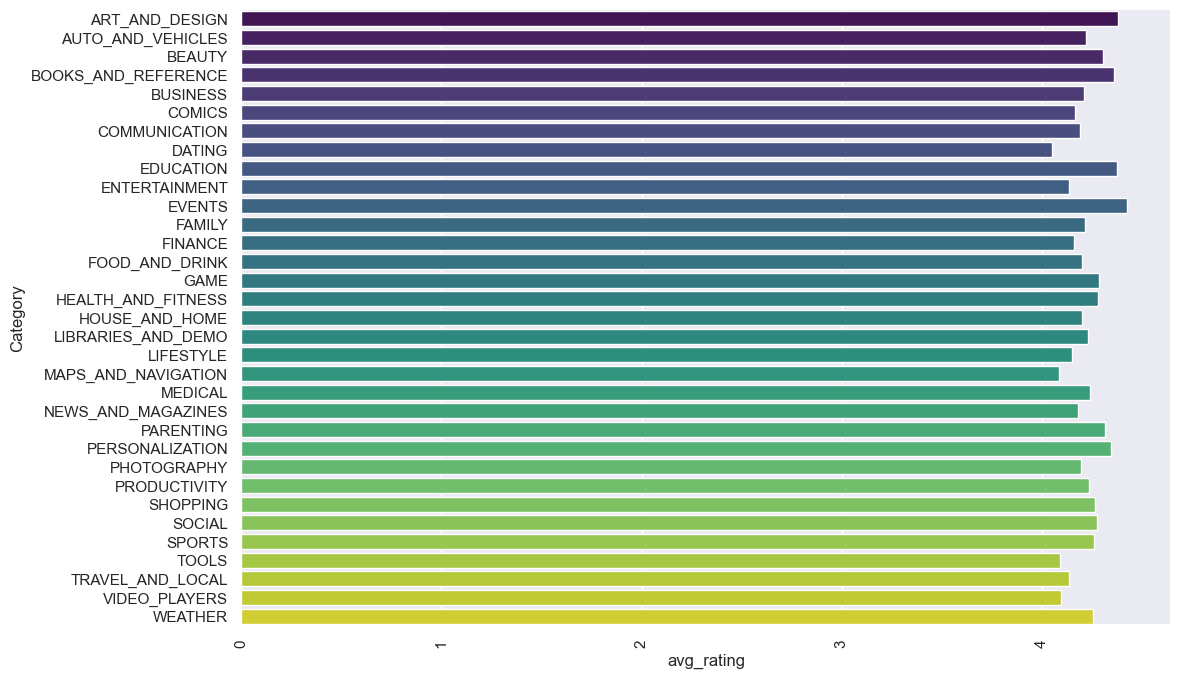

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_rating', y='Category', data=high_review_rating,palette='viridis')

plt.xticks(rotation=90)
plt.show()

Insight 8:All the category have average rating of above 4. This shows that almost all the category in google play store have a high rating.

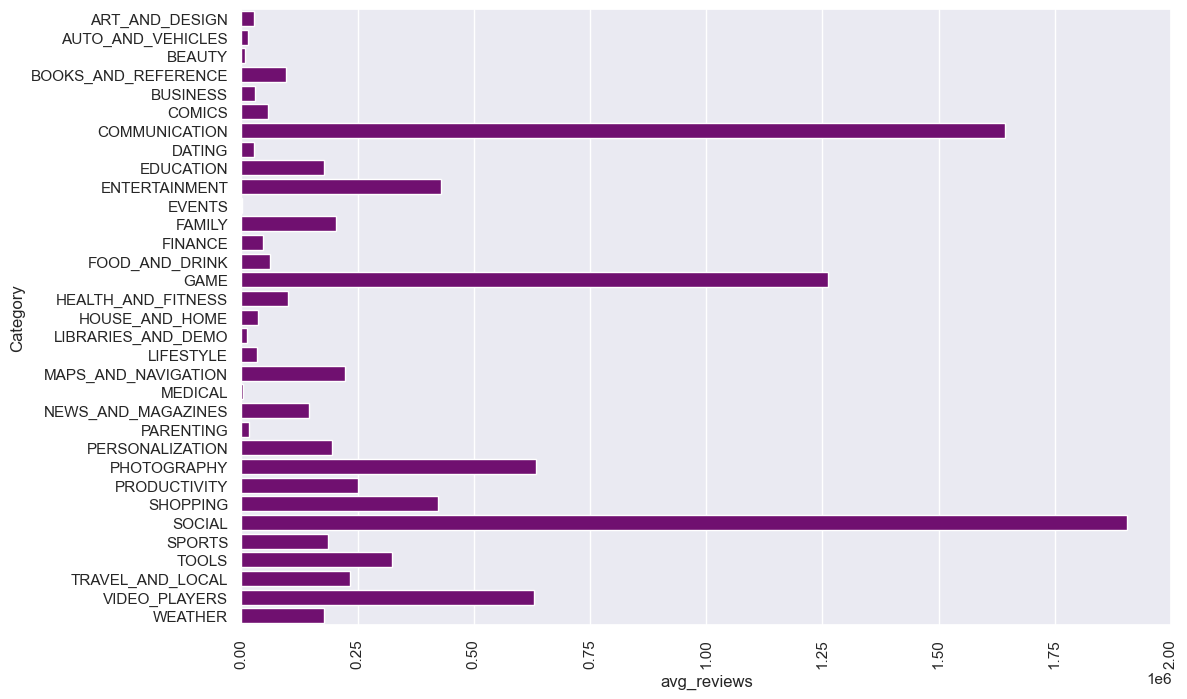

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_reviews', y='Category', data=high_review_rating,color='purple')

plt.xticks(rotation=90)
plt.show()

Insight 9: Usually people do not prefere to write reviews. However, the social,game and communication category has good amount of active users providing critics to the apps.

In [55]:
df_copy.drop(columns=['Genres','Last_Updated','Current_Ver','Android_Ver'],axis=1,inplace=True)

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  int32  
 4   Size            8821 non-null   float64
 5   Installs        10346 non-null  int32  
 6   Type            10346 non-null  int32  
 7   Price           10346 non-null  float64
 8   Content_Rating  10346 non-null  object 
 9   Date            10346 non-null  int32  
 10  Month           10346 non-null  int32  
 11  Year            10346 non-null  int32  
dtypes: float64(3), int32(6), object(3)
memory usage: 808.3+ KB


In [57]:
df_copy.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [58]:
categorical_columns=[feature for feature in df_copy.columns if df_copy[feature].dtype=='object']
categorical_columns

['App', 'Category', 'Content_Rating']

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded=encoder.fit_transform(df_copy[categorical_columns])


In [60]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(categorical_columns))
df_copy=pd.concat([df_copy,encoder_df],axis=1)

In [61]:
df_copy.drop(columns=['App', 'Category', 'Content_Rating'],inplace=True,axis=1)
df_copy.head()

,Rating,Reviews,Size,Installs,Type,Price,Date,Month,Year,"App_""i DT"" Fútbol. Todos Somos Técnicos.",...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,159.0,19000.0,10000.0,1.0,0.0,7.0,1.0,2018.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.9,967.0,14000.0,500000.0,1.0,0.0,15.0,1.0,2018.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.7,87510.0,8.7,5000000.0,1.0,0.0,1.0,8.0,2018.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.5,215644.0,25000.0,50000000.0,1.0,0.0,8.0,6.0,2018.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967.0,2.8,100000.0,1.0,0.0,20.0,6.0,2018.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Independent and Dependent Variable:

In [62]:
X=df_copy.drop('Rating',axis=1).to_numpy()
Y=df_copy['Rating']

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [66]:
#Definig a function for performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

def evalute_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    score=r2_score(true,predicted)
    return mae,rmse,score
    

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
}
model_list=[]
r2_list=[]

for i in range (len(list(models))):
    model=list(model.values())[i]
    model.fit(X_train,Y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_rmse,Model_train_r2=evaluate_model()

SyntaxError: incomplete input (4140619155.py, line 15)